### Import necessary packages

In [1]:
import tensorflow as tf
import librosa
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import wave
import os
import pickle

ROOT_DIR = r"C:\Users\d.sani\MIDAS\task1\tensorflow-speech-recognition-challenge"
labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "silence", "unknown"]

##### Load the dataset created in Experiment-1

In [2]:
with open('x_raw_audio.pickle', 'rb') as fp:
    x = pickle.load(fp)
    x = np.expand_dims(x, -1)
    
with open('y_raw_audio.pickle', 'rb') as fp:
    y = pickle.load(fp)

### Train-Test Split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Model Creation & Training

In [4]:
def Model(X, dropout=0.4):
    _input = tf.keras.layers.Input(X)
    x = tf.keras.layers.LSTM(128, return_sequences=True)(_input)
    x = tf.keras.layers.Activation(tf.nn.leaky_relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    x = tf.keras.layers.LSTM(64)(x)
    x = tf.keras.layers.Activation(tf.nn.leaky_relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    x = tf.keras.layers.Dense(64)(x)
    x = tf.keras.layers.Activation(tf.nn.leaky_relu)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    x = tf.keras.layers.Dense(len(labels))(x)
    x = tf.keras.layers.Activation(tf.nn.softmax)(x)
    return tf.keras.Model(_input, x)

model = Model(x[0].shape)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
checkpoint_filepath = "weights/"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
H = model.fit(x_train, y_train, batch_size=256, epochs=500, validation_split=0.25, shuffle=True, callbacks=[model_checkpoint_callback])

Epoch 1/500
59/59 [==============================] - 45s 770ms/step - loss: 2.8413 - accuracy: 0.0891 - val_loss: 2.4654 - val_accuracy: 0.0858
Epoch 2/500
59/59 [==============================] - 51s 867ms/step - loss: 2.7008 - accuracy: 0.0933 - val_loss: 2.4577 - val_accuracy: 0.0858
Epoch 3/500
59/59 [==============================] - 47s 802ms/step - loss: 2.6301 - accuracy: 0.0882 - val_loss: 2.4541 - val_accuracy: 0.0858
Epoch 4/500
59/59 [==============================] - 51s 857ms/step - loss: 2.5257 - accuracy: 0.0888 - val_loss: 2.4512 - val_accuracy: 0.0858
Epoch 5/500
59/59 [==============================] - 61s 1s/step - loss: 2.4770 - accuracy: 0.0912 - val_loss: 2.4496 - val_accuracy: 0.0858
Epoch 6/500
59/59 [==============================] - 57s 961ms/step - loss: 2.4589 - accuracy: 0.0905 - val_loss: 2.4487 - val_accuracy: 0.0858
Epoch 7/500
59/59 [==============================] - 46s 773ms/step - loss: 2.4518 - accuracy: 0.0918 - val_loss: 2.4492 - val_accuracy: 0.

59/59 [==============================] - 56s 956ms/step - loss: 2.3969 - accuracy: 0.1314 - val_loss: 4.1109 - val_accuracy: 0.0884
Epoch 58/500
59/59 [==============================] - 46s 783ms/step - loss: 2.3835 - accuracy: 0.1334 - val_loss: 3.3764 - val_accuracy: 0.0896
Epoch 59/500
59/59 [==============================] - 46s 785ms/step - loss: 2.3797 - accuracy: 0.1346 - val_loss: 27.8171 - val_accuracy: 0.0950
Epoch 60/500
59/59 [==============================] - 53s 906ms/step - loss: 2.3701 - accuracy: 0.1389 - val_loss: 2.7340 - val_accuracy: 0.0995
Epoch 61/500
59/59 [==============================] - 47s 796ms/step - loss: 2.3609 - accuracy: 0.1390 - val_loss: 2.5891 - val_accuracy: 0.1104
Epoch 62/500
59/59 [==============================] - 54s 917ms/step - loss: 2.3622 - accuracy: 0.1425 - val_loss: 2.6978 - val_accuracy: 0.0946
Epoch 63/500
59/59 [==============================] - 47s 791ms/step - loss: 2.3569 - accuracy: 0.1417 - val_loss: 2.3593 - val_accuracy: 0.15

59/59 [==============================] - 48s 818ms/step - loss: 1.9422 - accuracy: 0.3014 - val_loss: 1.9635 - val_accuracy: 0.2914
Epoch 114/500
59/59 [==============================] - 46s 784ms/step - loss: 1.9367 - accuracy: 0.3045 - val_loss: 1.9646 - val_accuracy: 0.2960
Epoch 115/500
59/59 [==============================] - 46s 776ms/step - loss: 1.9297 - accuracy: 0.3069 - val_loss: 2.3374 - val_accuracy: 0.2630
Epoch 116/500
59/59 [==============================] - 50s 849ms/step - loss: 1.9303 - accuracy: 0.3081 - val_loss: 1.9337 - val_accuracy: 0.3125
Epoch 117/500
59/59 [==============================] - 46s 773ms/step - loss: 1.9135 - accuracy: 0.3137 - val_loss: 2.0313 - val_accuracy: 0.2870
Epoch 118/500
59/59 [==============================] - 46s 775ms/step - loss: 1.9128 - accuracy: 0.3162 - val_loss: 2.0951 - val_accuracy: 0.2727
Epoch 119/500
59/59 [==============================] - 45s 769ms/step - loss: 1.9072 - accuracy: 0.3161 - val_loss: 2.0061 - val_accuracy:

59/59 [==============================] - 52s 884ms/step - loss: 1.6834 - accuracy: 0.4086 - val_loss: 1.8388 - val_accuracy: 0.3695
Epoch 170/500
59/59 [==============================] - 54s 911ms/step - loss: 1.6786 - accuracy: 0.4115 - val_loss: 1.9030 - val_accuracy: 0.3472
Epoch 171/500
59/59 [==============================] - 53s 891ms/step - loss: 1.6803 - accuracy: 0.4099 - val_loss: 1.8245 - val_accuracy: 0.3538
Epoch 172/500
59/59 [==============================] - 52s 878ms/step - loss: 1.6756 - accuracy: 0.4115 - val_loss: 1.8062 - val_accuracy: 0.3699
Epoch 173/500
59/59 [==============================] - 52s 880ms/step - loss: 1.6726 - accuracy: 0.4148 - val_loss: 1.9038 - val_accuracy: 0.3468
Epoch 174/500
59/59 [==============================] - 53s 891ms/step - loss: 1.6703 - accuracy: 0.4127 - val_loss: 1.8268 - val_accuracy: 0.3619
Epoch 175/500
59/59 [==============================] - 57s 960ms/step - loss: 1.6720 - accuracy: 0.4147 - val_loss: 1.8035 - val_accuracy:

59/59 [==============================] - 52s 886ms/step - loss: 1.5383 - accuracy: 0.4620 - val_loss: 1.8667 - val_accuracy: 0.3665
Epoch 226/500
59/59 [==============================] - 56s 943ms/step - loss: 1.5339 - accuracy: 0.4650 - val_loss: 1.9013 - val_accuracy: 0.3627
Epoch 227/500
59/59 [==============================] - 56s 941ms/step - loss: 1.5288 - accuracy: 0.4650 - val_loss: 1.8427 - val_accuracy: 0.3756
Epoch 228/500
59/59 [==============================] - 56s 947ms/step - loss: 1.5209 - accuracy: 0.4708 - val_loss: 1.9855 - val_accuracy: 0.3419
Epoch 229/500
59/59 [==============================] - 56s 942ms/step - loss: 1.5215 - accuracy: 0.4729 - val_loss: 1.8906 - val_accuracy: 0.3621
Epoch 230/500
59/59 [==============================] - 58s 975ms/step - loss: 1.5227 - accuracy: 0.4664 - val_loss: 1.8919 - val_accuracy: 0.3651
Epoch 231/500
59/59 [==============================] - 60s 1s/step - loss: 1.5099 - accuracy: 0.4720 - val_loss: 2.0120 - val_accuracy: 0.

59/59 [==============================] - 59s 1s/step - loss: 1.3991 - accuracy: 0.5162 - val_loss: 1.9253 - val_accuracy: 0.3695
Epoch 282/500
59/59 [==============================] - 54s 923ms/step - loss: 1.4018 - accuracy: 0.5162 - val_loss: 1.9748 - val_accuracy: 0.3687
Epoch 283/500
59/59 [==============================] - 55s 927ms/step - loss: 1.3979 - accuracy: 0.5177 - val_loss: 1.8888 - val_accuracy: 0.3729
Epoch 284/500
59/59 [==============================] - 62s 1s/step - loss: 1.3898 - accuracy: 0.5180 - val_loss: 2.0096 - val_accuracy: 0.3667
Epoch 285/500
59/59 [==============================] - 54s 912ms/step - loss: 1.3861 - accuracy: 0.5197 - val_loss: 1.9371 - val_accuracy: 0.3764
Epoch 286/500
59/59 [==============================] - 66s 1s/step - loss: 1.3796 - accuracy: 0.5195 - val_loss: 1.9755 - val_accuracy: 0.3774
Epoch 287/500
59/59 [==============================] - 65s 1s/step - loss: 1.3833 - accuracy: 0.5196 - val_loss: 1.9100 - val_accuracy: 0.3818
Epoc

59/59 [==============================] - 57s 974ms/step - loss: 1.2699 - accuracy: 0.5610 - val_loss: 2.0754 - val_accuracy: 0.3605
Epoch 338/500
59/59 [==============================] - 56s 955ms/step - loss: 1.2651 - accuracy: 0.5581 - val_loss: 2.0220 - val_accuracy: 0.3818
Epoch 339/500
59/59 [==============================] - 57s 960ms/step - loss: 1.2776 - accuracy: 0.5594 - val_loss: 2.1109 - val_accuracy: 0.3554
Epoch 340/500
59/59 [==============================] - 59s 993ms/step - loss: 1.2653 - accuracy: 0.5630 - val_loss: 2.0693 - val_accuracy: 0.3568
Epoch 341/500
59/59 [==============================] - 58s 981ms/step - loss: 1.2732 - accuracy: 0.5601 - val_loss: 2.0929 - val_accuracy: 0.3637
Epoch 342/500
59/59 [==============================] - 49s 831ms/step - loss: 1.2613 - accuracy: 0.5620 - val_loss: 2.1114 - val_accuracy: 0.3592
Epoch 343/500
59/59 [==============================] - 53s 902ms/step - loss: 1.2660 - accuracy: 0.5642 - val_loss: 2.1734 - val_accuracy:

59/59 [==============================] - 54s 920ms/step - loss: 1.1584 - accuracy: 0.5948 - val_loss: 2.2037 - val_accuracy: 0.3643
Epoch 394/500
59/59 [==============================] - 54s 914ms/step - loss: 1.1524 - accuracy: 0.6009 - val_loss: 2.2644 - val_accuracy: 0.3665
Epoch 395/500
59/59 [==============================] - 54s 918ms/step - loss: 1.1676 - accuracy: 0.6002 - val_loss: 2.1744 - val_accuracy: 0.3629
Epoch 396/500
59/59 [==============================] - 55s 924ms/step - loss: 1.1557 - accuracy: 0.6019 - val_loss: 2.2508 - val_accuracy: 0.3663
Epoch 397/500
59/59 [==============================] - 54s 918ms/step - loss: 1.1549 - accuracy: 0.6021 - val_loss: 2.2122 - val_accuracy: 0.3524
Epoch 398/500
59/59 [==============================] - 54s 918ms/step - loss: 1.1585 - accuracy: 0.5995 - val_loss: 2.2895 - val_accuracy: 0.3598
Epoch 399/500
59/59 [==============================] - 54s 916ms/step - loss: 1.1579 - accuracy: 0.6016 - val_loss: 2.2674 - val_accuracy:

59/59 [==============================] - 55s 926ms/step - loss: 1.0654 - accuracy: 0.6336 - val_loss: 2.3327 - val_accuracy: 0.3645
Epoch 450/500
59/59 [==============================] - 55s 925ms/step - loss: 1.0604 - accuracy: 0.6366 - val_loss: 2.4406 - val_accuracy: 0.3643
Epoch 451/500
59/59 [==============================] - 56s 952ms/step - loss: 1.0615 - accuracy: 0.6383 - val_loss: 2.5744 - val_accuracy: 0.3423
Epoch 452/500
59/59 [==============================] - 55s 941ms/step - loss: 1.0530 - accuracy: 0.6378 - val_loss: 2.4386 - val_accuracy: 0.3566
Epoch 453/500
59/59 [==============================] - 54s 923ms/step - loss: 1.0614 - accuracy: 0.6346 - val_loss: 2.4053 - val_accuracy: 0.3594
Epoch 454/500
59/59 [==============================] - 56s 951ms/step - loss: 1.0527 - accuracy: 0.6377 - val_loss: 2.5184 - val_accuracy: 0.3526
Epoch 455/500
59/59 [==============================] - 56s 950ms/step - loss: 1.0549 - accuracy: 0.6402 - val_loss: 2.3800 - val_accuracy:

Plot of the train history (X-axis: <i>EPOCHS</i>, Y-axis: <i>ACCURACY</i>)

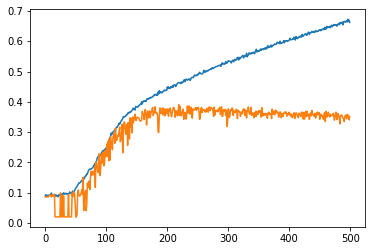

In [5]:
plt.plot(H.history["accuracy"])
plt.plot(H.history["val_accuracy"])

Load the best weights and evaluate the model

In [7]:
model.load_weights("weights/")
model.evaluate(x_train, y_train)

621/621 [==============================] - 24s 39ms/step - loss: 1.5242 - accuracy: 0.46570s - loss: 1.5222 - accuracy: 


[1.5241962671279907, 0.4656665325164795]

In [6]:
model.load_weights("weights/")
model.evaluate(x_test, y_test)

207/207 [==============================] - 9s 43ms/step - loss: 1.8067 - accuracy: 0.3958


[1.8066680431365967, 0.3958018720149994]